In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
import cv2
import matplotlib.image as mpimg

In [2]:
img1 = mpimg.imread('lenna.jpg')

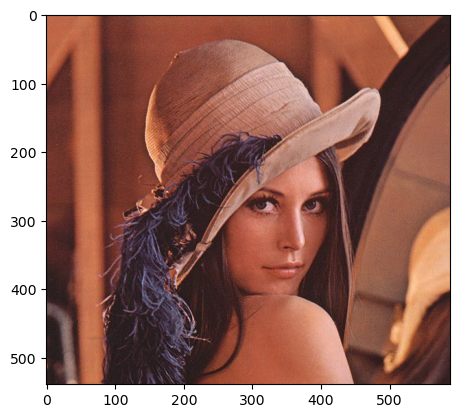

In [3]:
plt.imshow(img1);

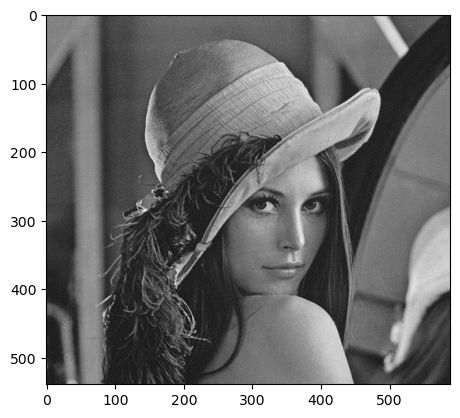

In [4]:
# RGB to Gray without built-in function
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

img_gray = rgb2gray(img1)
plt.imshow(img_gray, cmap=plt.get_cmap('gray'))
#plt.savefig('erock_gray.jpg')

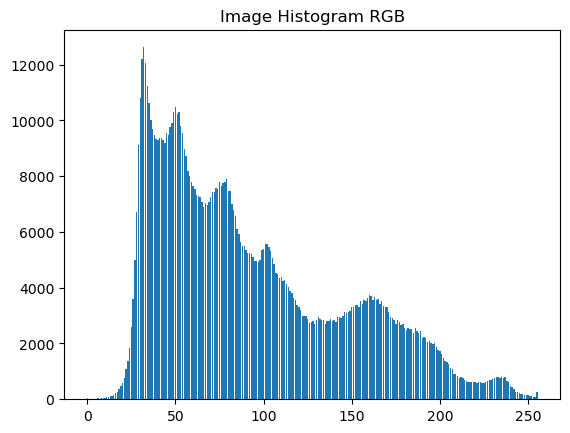

In [5]:
b = np.bincount(img1.ravel(), minlength=256)

x = np.arange(256)
plt.bar(x,b); plt.title('Image Histogram RGB');

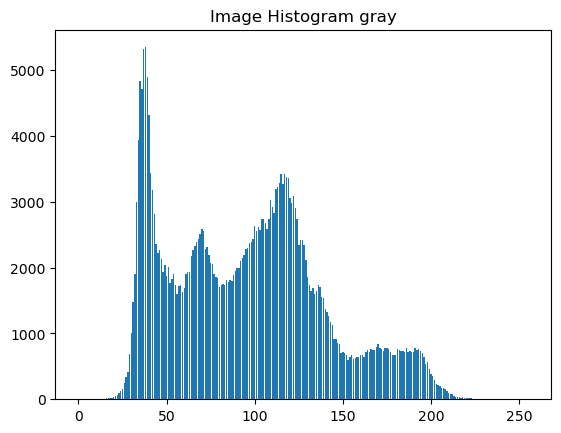

In [6]:
img_gray = img_gray.astype('int')
b = np.bincount(img_gray.ravel(), minlength=256)

x = np.arange(256)
plt.bar(x,b); plt.title('Image Histogram gray');

In [7]:
df = pd.DataFrame(b)
df.head()

,0
0,0
1,0
2,0
3,0
4,0


In [8]:
df = df.T

In [9]:
df

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,0,0,0,0,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#df.to_csv("Lenna.csv")

## Histogram Equalization

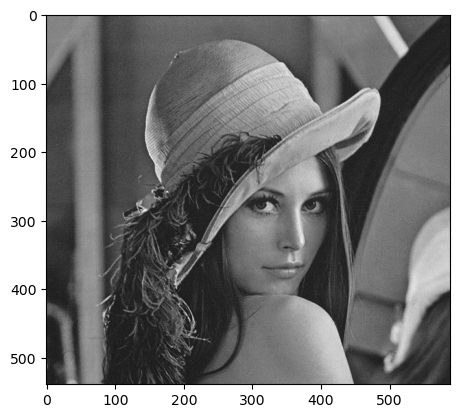

In [11]:
img = cv2.imread('lenna.jpg',0)
plt.imshow(img, cmap = plt.get_cmap('gray'));

In [12]:
def transformation(img, tx):
    width, height = img.shape
    newImg = np.array((img))
    for i in range(width):
        for j in range(height):
            newImg[i,j] = tx[img[i,j]]
    return newImg

In [13]:
def equalizeHistogram(img):
    width, height = img.shape
    hist = np.zeros((256))
    cdfTx = np.zeros((256))
    pixSum = 0
    
    for i in range(256):
        hist[i] = sum(sum(img == i))
        pixSum += hist[i]
        cdfTx[i] = pixSum
        
    hist = hist/(height*width)
    cdfTx = cdfTx * 255/(height*width)
    cdfTx = cdfTx.astype('uint8')
    return hist, cdfTx

In [14]:
hist, cdfTx = equalizeHistogram(img)
equalizedImg = transformation(img, cdfTx)

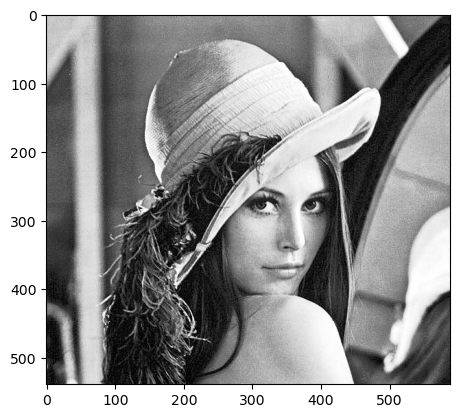

In [15]:
x = np.arange(256)
plt.imshow(equalizedImg, cmap=plt.get_cmap('gray'))

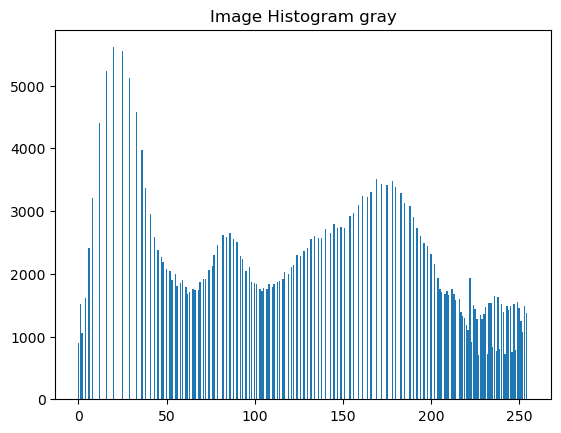

In [16]:
bins = np.bincount(equalizedImg.ravel(), minlength=256)

plt.bar(x,bins); plt.title('Image Histogram gray');

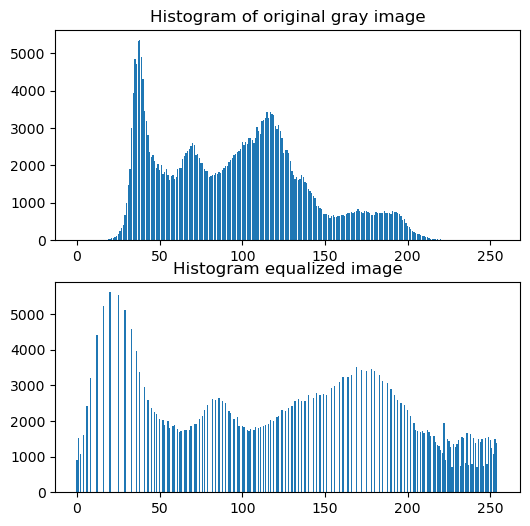

In [17]:
plt.figure(figsize=(6,6))
plt.subplot(211); plt.title('Histogram of original gray image'); plt.bar(x,b);
plt.subplot(212); plt.title('Histogram equalized image'); plt.bar(x,bins);